In [65]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_fixedy_200.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
pd.set_option('display.max_rows', 24)

data


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,eps_greedy_value,optimal_outcome_actions,opt_policy_index,opt_policy_value,optimal_outcome_policy
0,1212.718758,1716.034539,1493.380864,70,35.864521,2042.311510,57,38.476839,1707.830317
1,1604.841051,1359.665127,1098.343924,57,38.476839,1938.573719,57,38.476839,1685.551555
2,1569.364953,1982.065737,1674.929144,57,38.476839,2232.278329,57,38.476839,1908.518220
3,1753.902590,1811.408424,1484.782449,66,34.339229,2178.292223,57,38.476839,1944.396309
4,1732.249823,1887.095703,1433.194668,70,35.864521,2101.954990,57,38.476839,1876.133634
...,...,...,...,...,...,...,...,...,...
23,1802.663425,1731.904400,1476.258979,70,35.864521,2093.439315,57,38.476839,1761.813498
24,1772.699618,1789.072866,1250.647556,66,34.339229,2069.357604,57,38.476839,1805.449003
25,1682.874982,1538.939159,1131.186162,70,35.864521,2020.442267,57,38.476839,1574.478075
26,1976.540873,1701.979863,1122.991642,66,34.339229,1968.201263,57,38.476839,1818.993557


In [66]:
# Create new "regret" columns by subtracting other columns from "optimal_outcome_actions"
for column in data.columns:
    if column not in ['optimal_outcome_actions', 'optimal_outcome_policy', 'eps_greedy_policy', 'optimal_policy', "opt_policy_index", "eps_greedy_value", "opt_policy_value"]:
        data[f'regret_{column}'] = data['optimal_outcome_policy'] - data[column]

# Calculate the accumulative regret for each "regret" column
for column in data.columns:
    if 'regret_' in column:
        data[f'accumulative_{column}'] = data[column].cumsum()

# Display the first few rows of the modified dataframe to verify the new columns
data.head()


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,eps_greedy_value,optimal_outcome_actions,opt_policy_index,opt_policy_value,optimal_outcome_policy,regret_IpwEpsGreedy,regret_IpwBootTS,regret_RandomAction,accumulative_regret_IpwEpsGreedy,accumulative_regret_IpwBootTS,accumulative_regret_RandomAction
0,1212.718758,1716.034539,1493.380864,70,35.864521,2042.311510,57,38.476839,1707.830317,495.111559,-8.204221,214.449453,495.111559,-8.204221,214.449453
1,1604.841051,1359.665127,1098.343924,57,38.476839,1938.573719,57,38.476839,1685.551555,80.710504,325.886428,587.207631,575.822064,317.682207,801.657085
2,1569.364953,1982.065737,1674.929144,57,38.476839,2232.278329,57,38.476839,1908.518220,339.153267,-73.547517,233.589076,914.975330,244.134690,1035.246161
3,1753.902590,1811.408424,1484.782449,66,34.339229,2178.292223,57,38.476839,1944.396309,190.493719,132.987885,459.613860,1105.469050,377.122575,1494.860020
4,1732.249823,1887.095703,1433.194668,70,35.864521,2101.954990,57,38.476839,1876.133634,143.883811,-10.962069,442.938967,1249.352861,366.160506,1937.798987


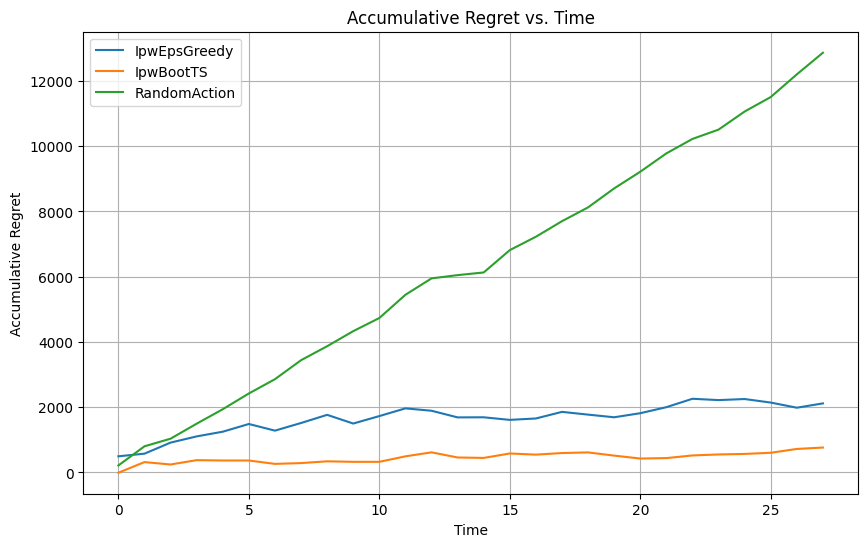

In [67]:
import matplotlib.pyplot as plt

# Plot accumulative regret vs. time (index)
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        ax.plot(data.index, data[column], label=column.replace('accumulative_regret_', ''))

ax.set_xlabel('Time')
ax.set_ylabel('Accumulative Regret')
ax.set_title('Accumulative Regret vs. Time')
ax.legend()

plt.grid(True)
plt.show()


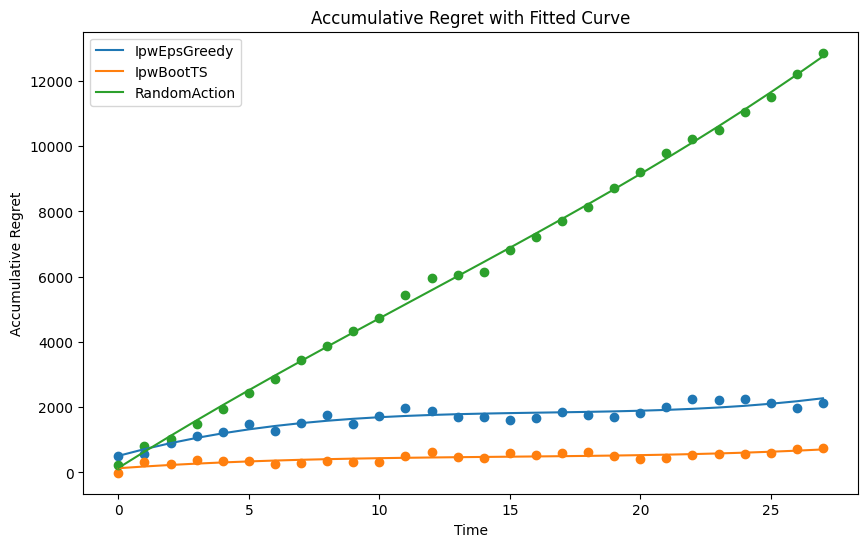

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the time index as x
x = np.arange(len(data))

# Define a function to fit the curve, using a polynomial function for simplicity
def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the curve

plt.figure(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        y = data[column].values
        params, params_covariance = curve_fit(poly_func, x, y)
        plt.scatter(x, y)
        plt.plot(x, poly_func(x, *params), label=column.replace('accumulative_regret_', ''))

# Plot the original data and the fitted curve


plt.title('Accumulative Regret with Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Accumulative Regret')
plt.legend()
plt.show()
